In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## step1 . 使用 pandas 讀檔

In [58]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## step2 .  取出所有的 Age 和 Sex 作為題目，和 Survived 作為答案並分為三個同名的 numpy array

In [59]:
Survived = df["Survived"]
Survived = np.array(Survived)
Survived.shape = (891,)

## step3 . Age中有些是空值，先換成0

In [60]:
Age = df["Age"]
Age = np.array(Age)
Age[np.isnan(Age)] = 0

## step4 . Sex中，將 Male 換成0 ，Famale 換成1

In [61]:
Sex = df["Sex"]
Sex = np.array(Sex)
Sex[Sex == "male"] = 0
Sex[Sex == "female"] = 1

## step5 . 請將 Sex 和 Age 兩個 array 合併成一個

In [62]:
Age = Age.reshape(891,1)
Sex = Sex.reshape(891,1)

In [63]:
data = np.concatenate([Sex,Age],axis=1)

In [64]:
data

array([[0, 22.0],
       [1, 38.0],
       [1, 26.0],
       ...,
       [1, 0.0],
       [0, 26.0],
       [0, 32.0]], dtype=object)

## step6 . 訓練測試看看

In [65]:
from sklearn.svm import SVC

In [68]:
clf = SVC(gamma='auto')
clf.fit(data,Survived)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

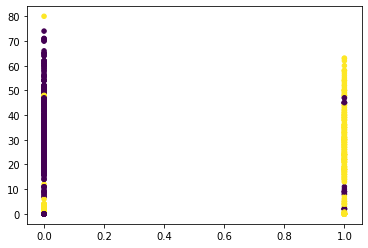

In [69]:
Survived_predict = clf.predict(data)
plt.scatter(data[:,0],data[:,1],s = 20,c = Survived_predict)

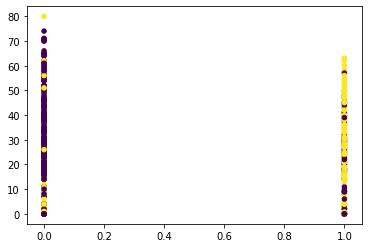

In [70]:
plt.scatter(data[:,0],data[:,1],s = 20,c = Survived)